## Guided Practice: Logit Function

### Part A: Using Statsmodels

In [1]:
import pandas as pd
import numpy as np
# Statsmodels logistic regression is sm.Logit
import statsmodels.api as sm

/Users/665066/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Read in the data collegeadmissions.csv as df
df = pd.read_csv('../../datasets/collegeadmissions.csv')

In [3]:
# show first few rows
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
# create dummies from rank and join it to df
df = df.join(pd.get_dummies(df['rank']))

In [5]:
# show first rows again
df.head()

,admit,gre,gpa,rank,1,2,3,4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [6]:
X = df[['gre', 'gpa', 1, 2, 3,]]
X = sm.add_constant(X)
y = df['admit']

lm = sm.Logit(y, X)
result = lm.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Wed, 06 Dec 2017   Pseudo R-squ.:                 0.08292
Time:                        14:40:11   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5414      1.138     -4.869      0.000      -7.772      -3.311
gre            0.0023      0.001      2.070      0.038       0.000       0.004
gpa            0.8040      0.332      2.423      0.015       0.154       1.454
1              1.5515      0.418      3.713      0.000       0.733       2.370
2              0.8760      0.367      2.389      0.017       0.157       1.595
3              0.2113      0.393      0.538      0.591      -0.559       0.981
==============================================================================
"""

In [7]:
print df.admit.mean()

0.3175


In [8]:
# You can easily convert these into odds using numpy.exp()
print np.exp(result.params)

const    0.003921
gre      1.002267
gpa      2.234545
1        4.718371
2        2.401325
3        1.235233
dtype: float64


The above makes it more clear that a schools rank as it approaches 4 decreases the odds of getting admitted.
The accuracy of the model with all features (removing one rank) is ~70%.

In [9]:
predicted = result.predict(X)
threshold = 0.5
predicted_classes = (predicted > threshold).astype(int)
from sklearn.metrics import accuracy_score
accuracy_score(y, predicted_classes)

0.70999999999999996

### Part B: ROC/AUC

Below is some code to walk through confusion matrices. It'll be useful for working through the Titanic problem.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

Below the ROC curve is based on various thresholds: it shows with a false positive rate (x-axis) ~0, it also expects a true positive rate (y-axis) ~0 (the same, ish, for the top right hand of the figure).

The second chart, which does not play with thesholds, shows the one true TPR and FPR point, joined to 0,0 and 1,1.

The first chart will be more effective as you compare models and determine where the decision line should exist for the data. The second simplifies the first in case this idea of thresholds is confusing.

In [11]:
fpr = roc_curve(df[['admit']], predicted)[0]
tpr = roc_curve(df[['admit']], predicted)[1]

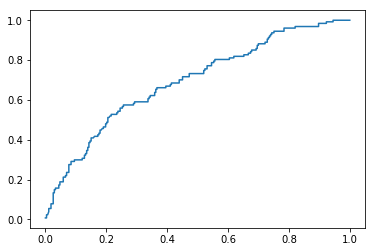

In [12]:
plt.plot(fpr, tpr)

Finally, you can use the `roc_auc_score` function to calculate the area under these curves (AUC).

In [13]:
roc_auc_score(df['admit'], predicted_classes)

0.58331170142193767

### Part C: Using SKLEARN

#### Note: sklearn also has logistic regression:
```
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X, y)
```

### Titanic Problem

In [14]:
# import survival.csv as titanic
titanic = pd.read_csv('../../datasets/survival.csv')

In [15]:
# show first few rows
titanic.head()

,PassengerId,is_male,Location,Class,Fare,Age,had_parents,had_siblings,Survived
0,1,1,0,0,7.2500,22.0,0,1,0
1,2,0,1,0,71.2833,38.0,0,1,1
2,3,0,0,0,7.9250,26.0,0,0,1
3,4,0,1,0,53.1000,35.0,0,1,1
4,5,1,0,0,8.0500,35.0,0,0,0


In [16]:
# set 'PassengerId' as the index with inplace=True
titanic.set_index('PassengerId', inplace=True)

Survived
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

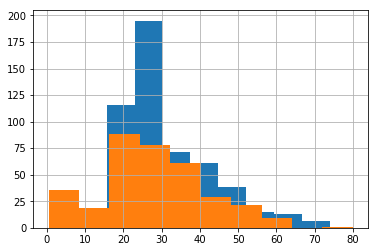

In [17]:
# Show histogram of age split by "survived" and "not survived"
%matplotlib inline
titanic.groupby('Survived').Age.hist()

In [18]:
# show last few rows of data
titanic.tail()

,is_male,Location,Class,Fare,Age,had_parents,had_siblings,Survived
PassengerId,,,,,,,,
887,1,0,1,13.00,27.00,0,0,0
888,0,1,0,30.00,19.00,0,0,1
889,0,0,0,23.45,21.75,1,1,0
890,1,1,0,30.00,26.00,0,0,1
891,1,0,0,7.75,32.00,0,0,0


In [19]:
# summary of data
titanic.describe()

,is_male,Location,Class,Fare,Age,had_parents,had_siblings,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.647587,0.242424,0.206510,32.204208,29.318643,0.239057,0.317621,0.383838
std,0.477990,0.428790,0.405028,49.693429,13.281103,0.426747,0.465813,0.486592
min,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,7.910400,21.750000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,14.454200,26.507589,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,31.000000,36.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,512.329200,80.000000,1.000000,1.000000,1.000000


In [20]:
from sklearn import grid_search, cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn import metrics 

# select your columns for inputs and create X_train, X_test, y_train, y_test
feature_set = titanic[['is_male', "Location", "Class", 'Fare', 'Age', 'had_parents', 'had_siblings']]
X_train, X_test, y_train, y_test = train_test_split(feature_set, titanic.Survived, test_size = .3)

# Create grid_search.GridSearchCV and tune "C" and "class_weight"
# "C": Inverse of regularization strength; must be a positive float. 
# Smaller C values specify stronger regularization.

# "class_weight" gives automatically more weight to "rare" class data.

gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'balanced']},
    cv=cross_validation.KFold(n=len(X_train), n_folds=10),
    scoring='roc_auc'
)

gs.fit(X_train, y_train)
gs.grid_scores_
#print gs.best_estimator_

/Users/665066/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/665066/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


[mean: 0.84705, std: 0.04974, params: {'C': 100000, 'class_weight': None},
 mean: 0.84677, std: 0.05086, params: {'C': 100000, 'class_weight': 'balanced'},
 mean: 0.84705, std: 0.04974, params: {'C': 10000, 'class_weight': None},
 mean: 0.84677, std: 0.05086, params: {'C': 10000, 'class_weight': 'balanced'},
 mean: 0.84705, std: 0.04974, params: {'C': 1000, 'class_weight': None},
 mean: 0.84677, std: 0.05086, params: {'C': 1000, 'class_weight': 'balanced'},
 mean: 0.84694, std: 0.04999, params: {'C': 100, 'class_weight': None},
 mean: 0.84665, std: 0.05077, params: {'C': 100, 'class_weight': 'balanced'},
 mean: 0.84771, std: 0.05043, params: {'C': 10, 'class_weight': None},
 mean: 0.84664, std: 0.05082, params: {'C': 10, 'class_weight': 'balanced'},
 mean: 0.84582, std: 0.05326, params: {'C': 1, 'class_weight': None},
 mean: 0.84464, std: 0.05352, params: {'C': 1, 'class_weight': 'balanced'},
 mean: 0.83643, std: 0.05905, params: {'C': 0.1, 'class_weight': None},
 mean: 0.83485, std: 0

In [21]:
print gs.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [22]:
y_pred = gs.best_estimator_.predict(X_test)

In [23]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[127,  31],
       [ 27,  83]])

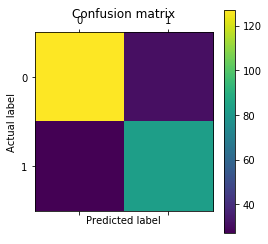

In [24]:
# Show confusion matrix in a separate window
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

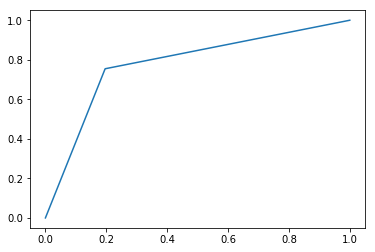

In [25]:
y_pro = gs.best_estimator_.predict_proba(X_test)
fpr = roc_curve(y_test, y_pred)[0]
tpr = roc_curve(y_test, y_pred)[1]
plt.plot(fpr, tpr)

In [26]:
roc_auc_score(y_test, y_pred)

0.77917146144994243

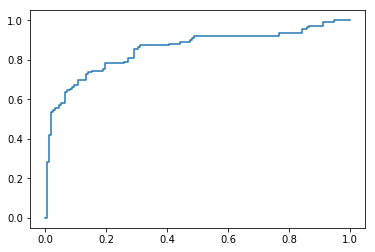

In [27]:
y_pro = gs.best_estimator_.predict_proba(X_test)
fpr = roc_curve(y_test, y_pro[:,1])[0]
tpr = roc_curve(y_test, y_pro[:,1])[1]
plt.plot(fpr, tpr)